# TESTING MED 1 kHz

(31250, 3)
[[1722. 1722. 1723.]
 [1440. 1440. 1440.]
 [1059. 1059. 1060.]
 ...
 [3232. 3232. 3233.]
 [2873. 2874. 2874.]
 [2480. 2480. 2481.]]


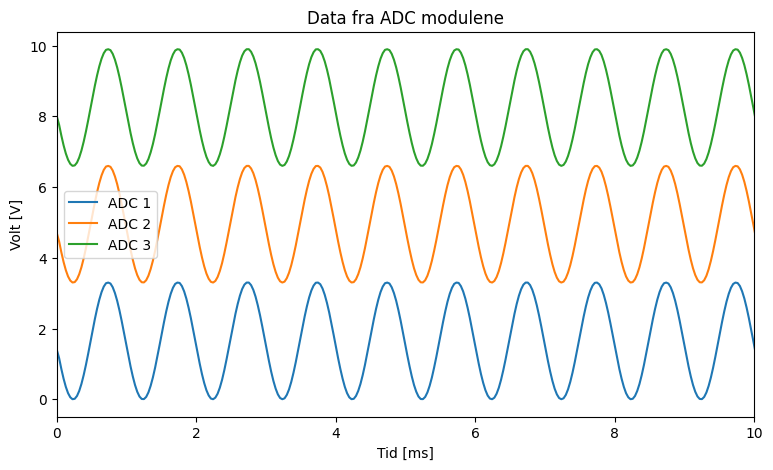

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from raspi_import import raspi_import

channels = 3 
freqIn = 1000   

periodsCount = 10
periodTime = 1/freqIn 
rangePeriod = periodsCount * periodTime 

sample_period, data = raspi_import(f'Målinger/test4.bin', channels)

print(data.shape)

time_axis = np.arange(data.shape[0]) * sample_period

print(data)

C = 3.3  

def converter(data): 
    resulution = 2**12
    Vconv = (C/resulution * data)
    return Vconv

Type = ["-", "dashed","-."]
colors = ['blue', 'red', 'yellow']
plt.figure(figsize=(9, 5))
for i in range(channels):
    plt.plot(time_axis, converter(data[:, i]) + i*C, label=f'ADC {i+1}')
    #plt.plot(time_axis, converter(data[:, i]) , label=f'Channel {i+1}', linestyle=Type[i], color=colors[i])
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x*1e3:g}"))

plt.xlim(0, rangePeriod)
plt.xlabel("Tid [ms]")
plt.ylabel("Volt [V]")
plt.title("Data fra ADC modulene")
plt.legend()
plt.savefig('Figurer/Data fra ADC 1kHz.png', dpi = 300)
plt.show()



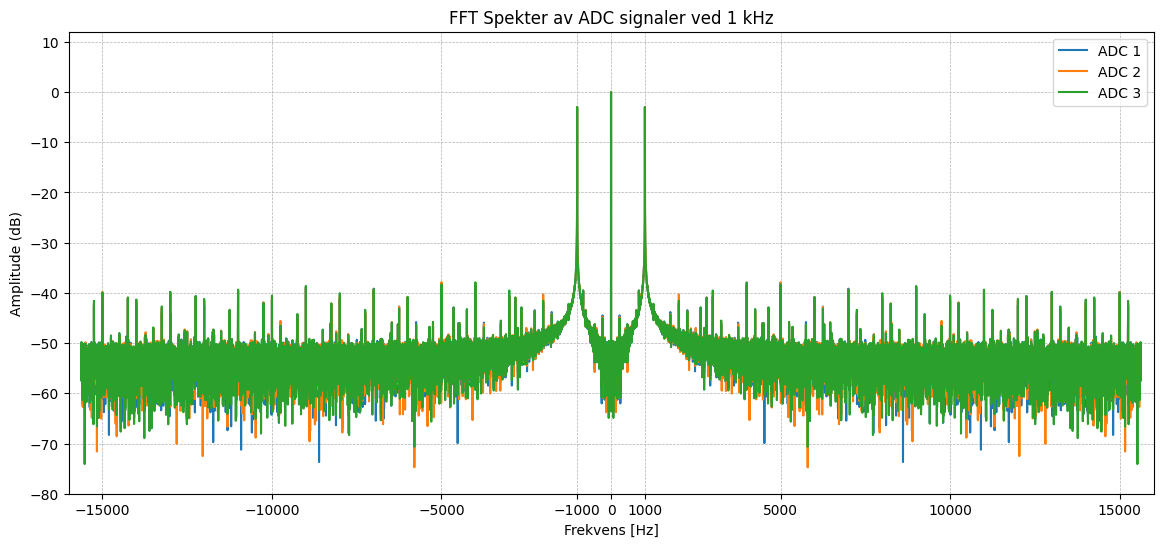

In [3]:
# Beregn FFT for hvert signal
N = len(data)
fft_data = []
frequencies = np.fft.fftfreq(data.shape[0], d=sample_period)
frequencies = np.fft.fftshift(frequencies)  
for i in range(channels):
    signal = converter(data[:, i]) 
    fft_result = np.fft.fft(signal, n=N)  
    fft_result = np.fft.fftshift(fft_result)
    fft_data.append(np.abs(fft_result))  

# Plott FFT-spekteret med forbedret y-akse
plt.figure(figsize=(14, 6))
for i in range(channels):
    max_value = np.max(10 * np.log10(fft_data[i] + 1e-10))
    plt.plot(frequencies, 
             10 * np.log10(fft_data[i] + 1e-10) - max_value, label=f'ADC {i+1}')


plt.xlabel("Frekvens [Hz]")
plt.ylabel("Amplitude (dB)")
plt.title("FFT Spekter av ADC signaler ved 1 kHz")
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Sett y-aksegrense og merkene
plt.ylim(-60, 12)  
plt.yticks(np.arange(-80, 11, 10))  
plt.xlim(-16000, 16000)
plt.xticks(ticks=[-15000, -10000, -5000, -1000, 0,1000, 5000, 10000, 15000])  
plt.savefig('Figurer/FFT_Data_fra_ADC_1kHz_shifted.png', dpi=300)
plt.show()

### HANNING WINDOW

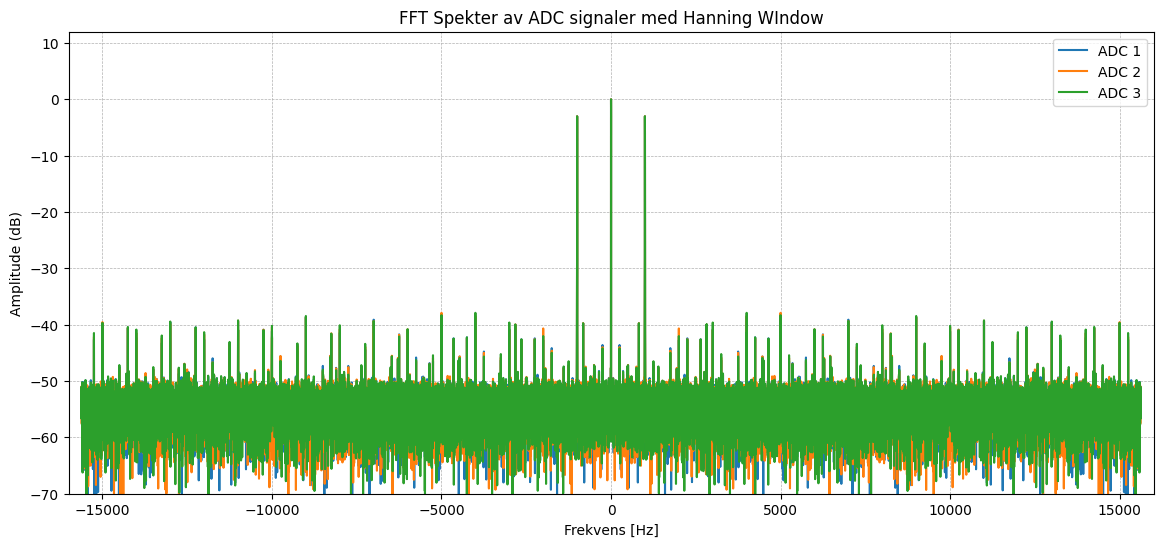

In [4]:
window = np.hanning(data.shape[0])
# Beregn FFT for hvert signal
fft_data = []
frequencies = np.fft.fftfreq(data.shape[0], d=sample_period)
frequencies = np.fft.fftshift(frequencies)  
for i in range(channels):
    signal = converter(data[:, i]) * window 
    fft_result = np.fft.fft(signal)  
    fft_result = np.fft.fftshift(fft_result)
    fft_data.append(np.abs(fft_result))  

# Plott FFT-spekteret med forbedret y-akse
plt.figure(figsize=(14, 6))
for i in range(channels):
    max_value = np.max(10 * np.log10(fft_data[i] + 1e-10))
    plt.plot(frequencies, 
             10 * np.log10(fft_data[i] + 1e-10) - max_value, label=f'ADC {i+1}')

plt.xlabel("Frekvens [Hz]")
plt.ylabel("Amplitude (dB)")
plt.title("FFT Spekter av ADC signaler med Hanning WIndow")
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)


plt.ylim(-60, 12)  
plt.yticks(np.arange(-70, 11, 10))  
plt.xlim(-16000, 16000)  
plt.xticks(ticks=[-15000, -10000, -5000, 0, 5000, 10000, 15000]) 
plt.savefig('Figurer/FFT_Data_fra_ADC_5kHz_Hanning.png', dpi=300)
plt.show()

# TESTING MED 5 kHz

(31250, 3)
[[4048. 4049. 4050.]
 [3849. 3849. 3850.]
 [2168. 2168. 2169.]
 ...
 [ 906.  906.  907.]
 [   0.    0.    0.]
 [ 987.  988.  989.]]


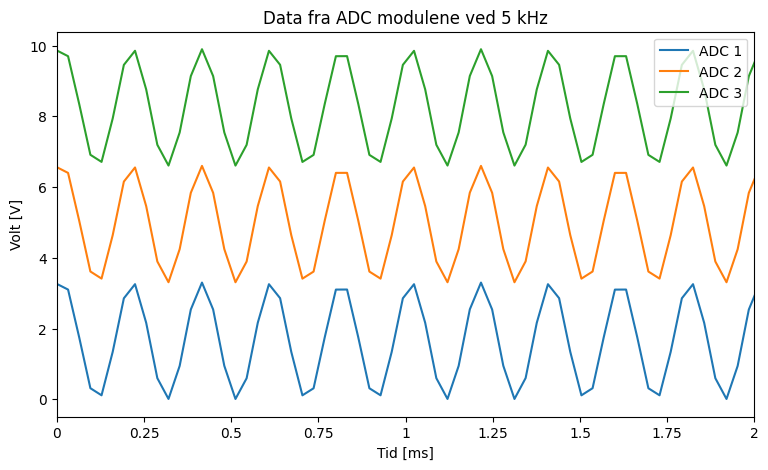

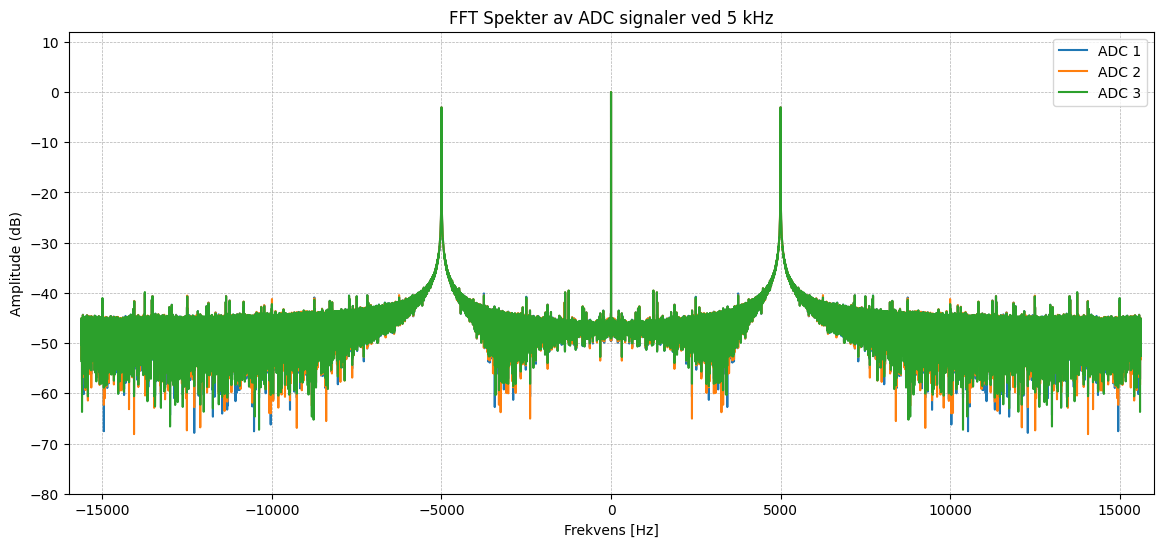

In [5]:

channels = 3 
freqIn = 1000   

periodsCount = 2
periodTime = 1/freqIn 
rangePeriod = periodsCount * periodTime 

sample_period, data = raspi_import(f'Målinger/5kHz.bin', channels)

print(data.shape)

time_axis = np.arange(data.shape[0]) * sample_period

print(data)

C = 3.3  

def converter(data): 
    resulution = 2**12
    Vconv = (C/resulution * data)
    return Vconv

Type = ["-", "dashed","-."]
colors = ['blue', 'red', 'yellow']
plt.figure(figsize=(9, 5))
for i in range(channels):
    plt.plot(time_axis, converter(data[:, i]) + i*C, label=f'ADC {i+1}')
    #plt.plot(time_axis, converter(data[:, i]) , label=f'Channel {i+1}', linestyle=Type[i], color=colors[i])
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x*1e3:g}"))

plt.xlim(0, rangePeriod)
plt.xlabel("Tid [ms]")
plt.ylabel("Volt [V]")
plt.title("Data fra ADC modulene ved 5 kHz")
plt.legend(loc='upper right')
plt.savefig('Figurer/Data fra ADC 5kHz.png', dpi = 300)
plt.show()


fft_data = []
frequencies = np.fft.fftfreq(data.shape[0], d=sample_period)
frequencies = np.fft.fftshift(frequencies)  
for i in range(channels):
    signal = converter(data[:, i]) 
    fft_result = np.fft.fft(signal)  
    fft_result = np.fft.fftshift(fft_result)
    fft_data.append(np.abs(fft_result))  

# Plott FFT-spekteret med forbedret y-akse
plt.figure(figsize=(14, 6))
for i in range(channels):
    max_value = np.max(10 * np.log10(fft_data[i] + 1e-10))
    plt.plot(frequencies, 
             10 * np.log10(fft_data[i] + 1e-10) - max_value, label=f'ADC {i+1}')


plt.xlabel("Frekvens [Hz]")
plt.ylabel("Amplitude (dB)")
plt.title("FFT Spekter av ADC signaler ved 5 kHz")
plt.legend()

plt.grid(which='both', linestyle='--', linewidth=0.5)

# Sett y-aksegrense og merkene
plt.ylim(-60, 12)  
plt.yticks(np.arange(-80, 11, 10))  
plt.xlim(-16000, 16000)
plt.xticks(ticks=[-15000, -10000, -5000, 0, 5000, 10000, 15000])  
plt.savefig('Figurer/FFT_Data_fra_ADC_5kHz.png', dpi=300)
plt.show()

### Hanning window

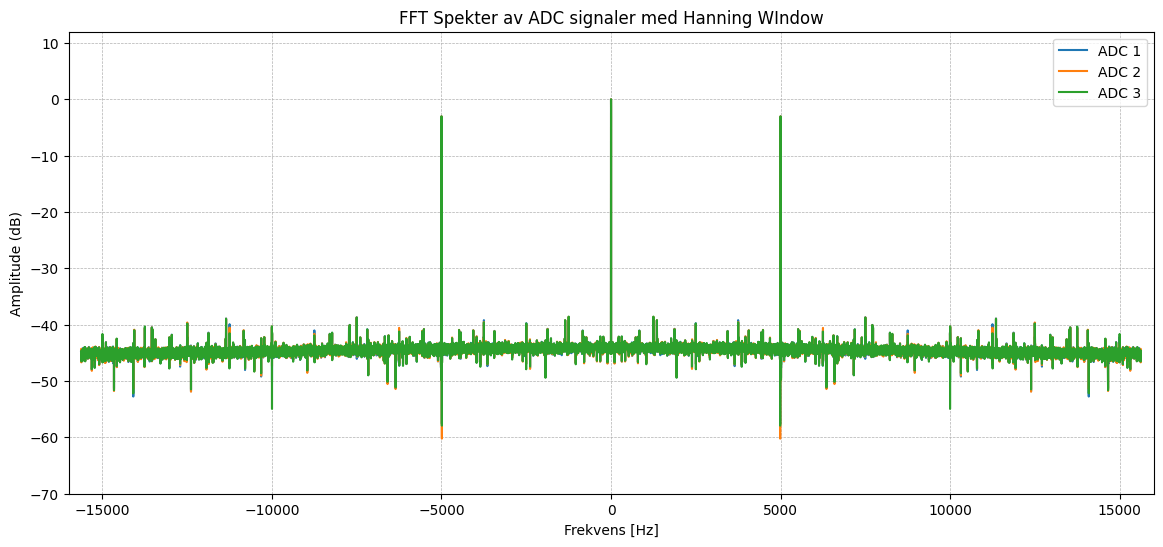

In [6]:
window = np.hanning(data.shape[0])
# Beregn FFT for hvert signal
fft_data = []
frequencies = np.fft.fftfreq(data.shape[0], d=sample_period)
frequencies = np.fft.fftshift(frequencies)  
for i in range(channels):
    signal = converter(data[:, i]) * window 
    fft_result = np.fft.fft(signal)  
    fft_result = np.fft.fftshift(fft_result)
    fft_data.append(np.abs(fft_result))  

# Plott FFT-spekteret med forbedret y-akse
plt.figure(figsize=(14, 6))
for i in range(channels):
    max_value = np.max(10 * np.log10(fft_data[i] + 1e-10))
    plt.plot(frequencies, 
             10 * np.log10(fft_data[i] + 1e-10) - max_value, label=f'ADC {i+1}')

plt.xlabel("Frekvens [Hz]")
plt.ylabel("Amplitude (dB)")
plt.title("FFT Spekter av ADC signaler med Hanning WIndow")
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)


plt.ylim(-60, 12)  
plt.yticks(np.arange(-70, 11, 10))  
plt.xlim(-16000, 16000)  
plt.xticks(ticks=[-15000, -10000, -5000, 0, 5000, 10000, 15000]) 
plt.savefig('Figurer/FFT_Data_fra_ADC_5kHz_Hanning.png', dpi=300)
plt.show()

# TESTING MED OG UTEN FILTER

[[4048. 4049. 4050.]
 [3849. 3849. 3850.]
 [2168. 2168. 2169.]
 ...
 [ 906.  906.  907.]
 [   0.    0.    0.]
 [ 987.  988.  989.]]
[[4048. 4049. 4050.]
 [3849. 3849. 3850.]
 [2168. 2168. 2169.]
 ...
 [ 906.  906.  907.]
 [   0.    0.    0.]
 [ 987.  988.  989.]]


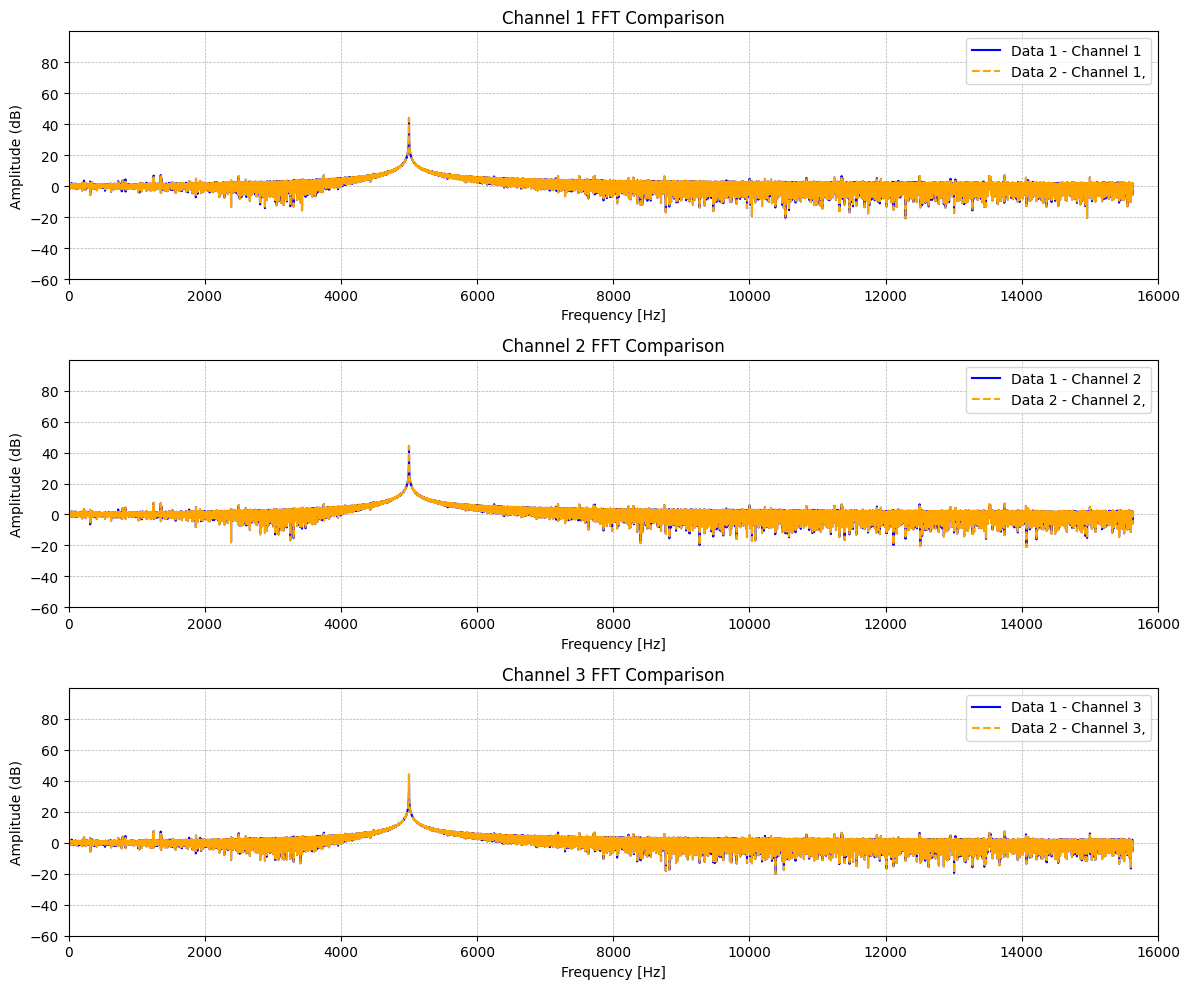

In [7]:
# Beregn FFT for hvert signal
channels = 3
#freqIn = 50    #50 Hz
freqIn = 1000   #1 kHz
test = 1

periodsCount = 10 #How many periods you want to display
periodTime = 1/freqIn  #seconds
rangePeriod = periodsCount * periodTime 

sample_period1, data1 = raspi_import(f'Målinger/5kHz.bin', channels)
sample_period2, data2 = raspi_import(f'Målinger/5kHz.bin', channels)

time_axis1 = np.arange(data1.shape[0]) * sample_period1
time_axis2 = np.arange(data2.shape[0]) * sample_period2

print(data1)
print(data2)

C = 3.3  # volts per count for MCP3201 with Vref = 3.3V

# Opprett subplots for å sammenligne hver kanal
fig, axs = plt.subplots(channels, 1, figsize=(12, 10))

for i in range(channels):
    # Beregn FFT for data1
    signal1 = converter(data1[:, i])  # Konverter signalet til volt
    fft_result1 = np.fft.fft(signal1)  # Beregn FFT
    fft_data1 = np.abs(fft_result1)  # Ta absoluttverdien for spekteret

    # Beregn FFT for data2
    signal2 = converter(data2[:, i])  # Konverter signalet til volt
    fft_result2 = np.fft.fft(signal2)  # Beregn FFT
    fft_data2 = np.abs(fft_result2)  # Ta absoluttverdien for spekteret

    # Frekvensaksen
    frequencies = np.fft.fftfreq(data1.shape[0], d=sample_period1)

    # Plott data for kanal i

    alpha_value = 0.5 
    axs[i].plot(frequencies[:len(frequencies)//2], 
                10 * np.log10(fft_data1[:len(frequencies)//2] + 1e-10), 
                label=f'Data 1 - Channel {i+1}', color = 'blue')
    axs[i].plot(frequencies[:len(frequencies)//2], 
                10 * np.log10(fft_data2[:len(frequencies)//2] + 1e-10), 
                linestyle='--', label=f'Data 2 - Channel {i+1},', color='orange')
    axs[i].set_xlabel("Frequency [Hz]")
    axs[i].set_ylabel("Amplitude (dB)")
    axs[i].set_title(f"Channel {i+1} FFT Comparison")
    axs[i].legend()
    axs[i].grid(which='both', linestyle='--', linewidth=0.5)
    axs[i].set_ylim(-60, 100)  # Sett y-aksen fra -60 dB til 100 dB
    axs[i].set_xlim(0, 16000)  # Sett x-aksen fra 4000 Hz til 6000 Hz
    axs[i].set_yticks(np.arange(-60, 100, 20))  # Merk y-aksen med intervaller på 10 dB

plt.tight_layout()
plt.show()